# 2D Convolution (Image Filtering)
Like in one-dimensional signals, images can be filtered via low-pass filters (LPF), and high-pass filters (HPF). LPF removes noise and blurring in image while HPF finds edges in the image. Use cv2.filter2D to convolve with the image

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

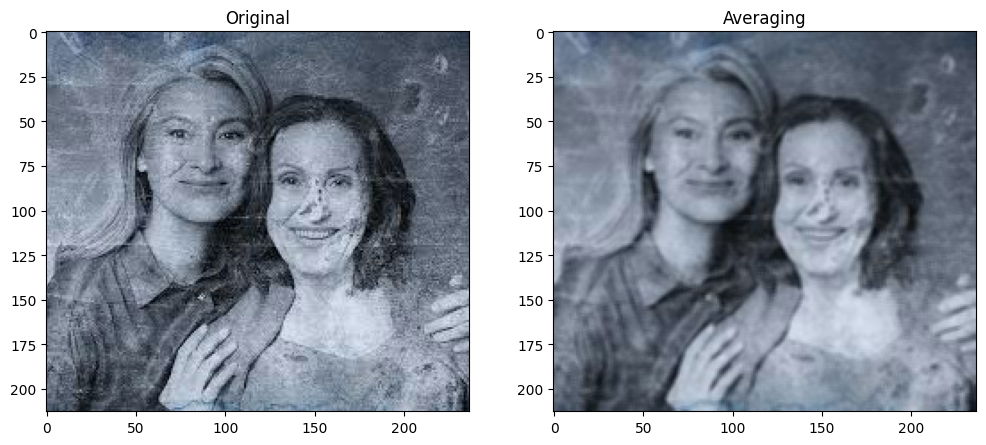

In [2]:
plt.figure(figsize=(12, 10))

img = cv2.imread('./assets/old_image.jpg')

kernel_size = 3
kernel = np.ones(shape=(kernel_size, kernel_size), dtype=np.float32) / (kernel_size ** 2)
dst = cv2.filter2D(src=img, ddepth=-1, kernel=kernel)

plt.subplot(121)
plt.imshow(img)
plt.title('Original')
plt.subplot(122)
plt.imshow(dst)
plt.title('Averaging')

plt.show()

Image blurring is achieved by convolving the image with LPF kernel - to remove noise and high frequency content.

Image blurring types:
1. Averaging - convolve with normalized box filter, take the average of all the pixels under the kernel and replace the central element.
2. Gaussian blurring - instead of box filter, we use gaussian kernel - cv2.GaussianBlur()
3. Median blurring - cv2.medianBlur() takes median of all the pixels under the kernel area and the central element is replaced with this median value - best against salt-and-pepper noise.
4. Bilateral filtering - cv2.bilateralFilter() - highly effective in noise removal while keeping edges sharp - it is slow operation.

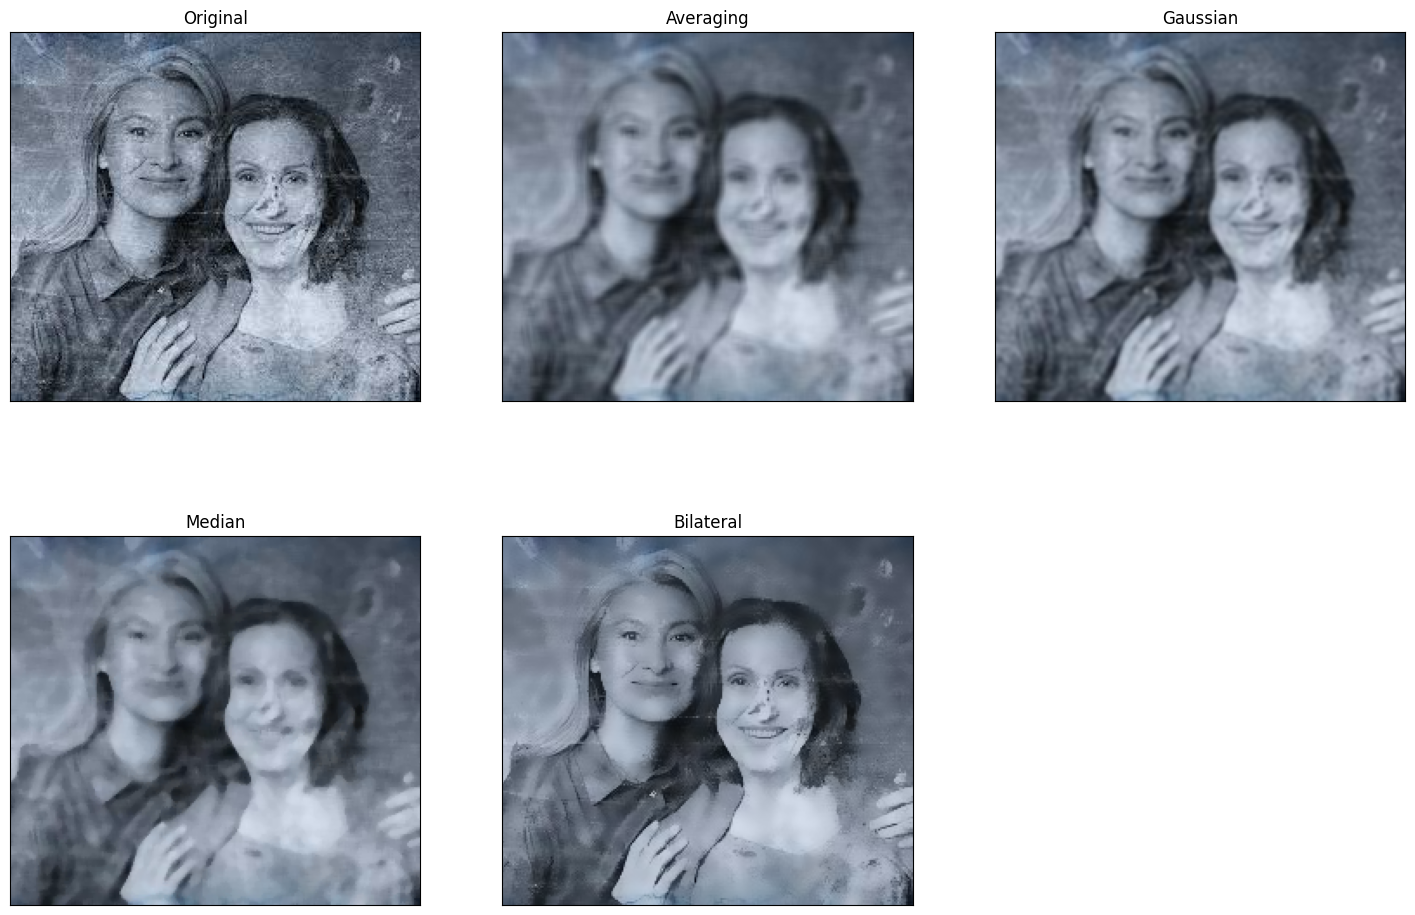

In [3]:
plt.figure(figsize=(18, 12))

img = cv2.imread('./assets/old_image.jpg')

kernel_size = 5
blur = cv2.blur(src=img, ksize=(kernel_size, kernel_size))
gaussian = cv2.GaussianBlur(src=img, ksize=(kernel_size, kernel_size), sigmaX=0)
median = cv2.medianBlur(src=img, ksize=kernel_size)
bilateral = cv2.bilateralFilter(src=img, d=9, sigmaColor=75, sigmaSpace=75)

titles = ['Original', 'Averaging', 'Gaussian', 'Median', 'Bilateral']
images = [img, blur, gaussian, median, bilateral]

for i in range(len(titles)):
    plt.subplot(2, 3, i+1)
    plt.imshow(images[i])
    plt.title(titles[i])
    plt.xticks([])
    plt.yticks([])

plt.show()

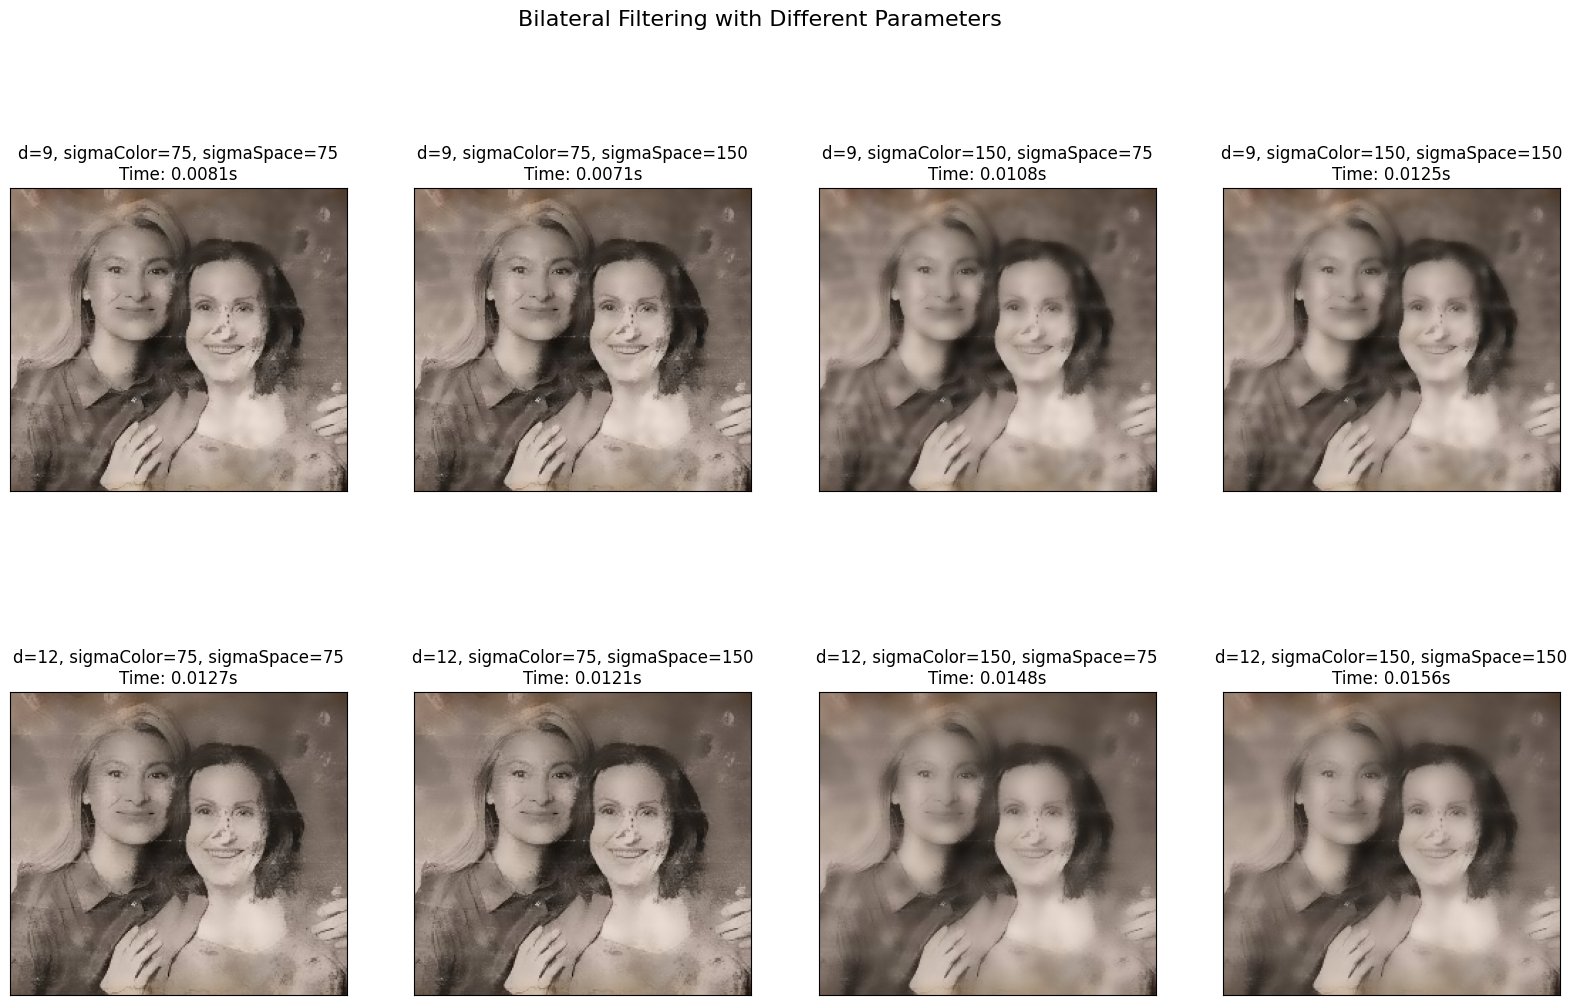

In [5]:
# --- Bilateral Filtering: Comparison of different parameters ---

import time
params = [
    (9, 75, 75),  # (d, sigmaColor, sigmaSpace)
    (9, 75, 150),
    (9, 150, 75),
    (9, 150, 150),
    (12, 75, 75),
    (12, 75, 150),
    (12, 150, 75),
    (12, 150, 150)
]

plt.figure(figsize=(20, 12))
plt.suptitle('Bilateral Filtering with Different Parameters', fontsize=16)

for i, (d, sigmaColor, sigmaSpace) in enumerate(params):
    start = time.time()
    bilateral = cv2.bilateralFilter(img, d, sigmaColor, sigmaSpace)
    end = time.time()
    
    plt.subplot(2, 4, i + 1)
    plt.imshow(cv2.cvtColor(bilateral, cv2.COLOR_BGR2RGB))
    plt.title(f'd={d}, sigmaColor={sigmaColor}, sigmaSpace={sigmaSpace}\nTime: {end - start:.4f}s')
    plt.xticks([]), plt.yticks([])

plt.show()